In [73]:
from scipy.io import loadmat
import numpy as np

Indian pines

In [74]:
ipx = loadmat('/content/drive/MyDrive/Indian_pines_corrected.mat')['indian_pines_corrected']
ipy = loadmat('/content/drive/MyDrive/Indian_pines_gt.mat')['indian_pines_gt']
ipx.shape,ipy.shape

((145, 145, 200), (145, 145))

Pavia


In [75]:
px = loadmat('/content/drive/MyDrive/Pavia.mat')['pavia']
py = loadmat('/content/drive/MyDrive/Pavia_gt.mat')['pavia_gt']
px.shape,py.shape

((1096, 715, 102), (1096, 715))

Target

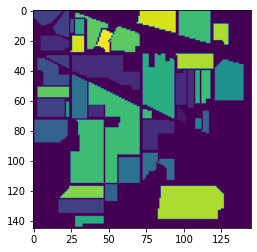

In [76]:
import matplotlib.pyplot as plt
plt.imshow(ipy)

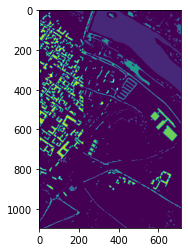

In [77]:
plt.imshow(py)

**INDIAN PINES**



Preprocessing

In [78]:
np.unique(ipy)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [79]:
ipx = ipx.reshape(145*145,200,1)
ipy = ipy.reshape(145*145)
ipx.shape,ipy.shape

((21025, 200, 1), (21025,))

In [80]:
from keras.utils import to_categorical
ipy = to_categorical(ipy)
ipy.shape

(21025, 17)

Model

In [81]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Activation, Dropout, Flatten, Dense

In [82]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(200,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(99,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(17, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 198, 16)           64        
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 99, 16)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 97, 32)            1568      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 48, 32)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               153700    
_________________________________________________________________
dense_11 (Dense)             (None, 17)               

Training and comipiling - indian pines

In [84]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ipx, ipy, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16820, 200, 1), (16820, 17), (4205, 200, 1), (4205, 17))

In [85]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
526/526 [==============================] - 6s 11ms/step - loss: 32.0099 - accuracy: 0.4354 - val_loss: 2.3064 - val_accuracy: 0.1843
Epoch 2/20
526/526 [==============================] - 5s 10ms/step - loss: 1.9616 - accuracy: 0.4937 - val_loss: 1.7516 - val_accuracy: 0.5463
Epoch 3/20
526/526 [==============================] - 5s 10ms/step - loss: 1.7532 - accuracy: 0.5491 - val_loss: 1.6756 - val_accuracy: 0.5460
Epoch 4/20
526/526 [==============================] - 5s 10ms/step - loss: 1.6111 - accuracy: 0.5526 - val_loss: 1.6760 - val_accuracy: 0.5558
Epoch 5/20
526/526 [==============================] - 5s 10ms/step - loss: 1.5438 - accuracy: 0.5489 - val_loss: 1.5579 - val_accuracy: 0.5161
Epoch 6/20
526/526 [==============================] - 6s 11ms/step - loss: 1.4971 - accuracy: 0.5486 - val_loss: 1.5201 - val_accuracy: 0.5522
Epoch 7/20
526/526 [==============================] - 5s 10ms/step - loss: 1.4740 - accuracy: 0.5392 - val_loss: 1.4539 - val_accuracy: 0.537

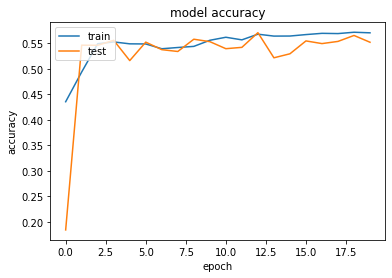

In [86]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

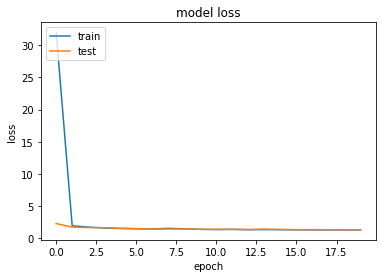

In [87]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**PAVIA**

In [88]:
px.shape,py.shape

((1096, 715, 102), (1096, 715))

In [89]:
px = px.reshape(1096*715,102,1)
py = py.reshape(1096*715)
px.shape,py.shape

((783640, 102, 1), (783640,))

In [90]:
np.unique(py)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [91]:
py = to_categorical(py)
py.shape

(783640, 10)

Model

In [92]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(102,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(50,16)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 100, 16)           64        
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 50, 16)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 48, 32)            1568      
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 24, 32)            0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               76900     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [94]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(px, py, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((548548, 102, 1), (548548, 10), (235092, 102, 1), (235092, 10))

In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
17143/17143 [==============================] - 108s 6ms/step - loss: 0.5190 - accuracy: 0.8722 - val_loss: 0.3120 - val_accuracy: 0.8799
Epoch 2/5
17143/17143 [==============================] - 108s 6ms/step - loss: 0.2994 - accuracy: 0.8836 - val_loss: 0.3044 - val_accuracy: 0.8749
Epoch 3/5
17143/17143 [==============================] - 107s 6ms/step - loss: 0.2859 - accuracy: 0.8861 - val_loss: 0.2790 - val_accuracy: 0.8875
Epoch 4/5
17143/17143 [==============================] - 108s 6ms/step - loss: 0.2797 - accuracy: 0.8876 - val_loss: 0.2774 - val_accuracy: 0.8884
Epoch 5/5
17143/17143 [==============================] - 108s 6ms/step - loss: 0.2764 - accuracy: 0.8883 - val_loss: 0.2757 - val_accuracy: 0.8881


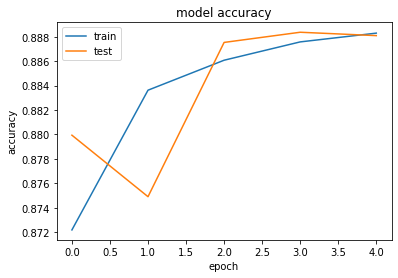

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

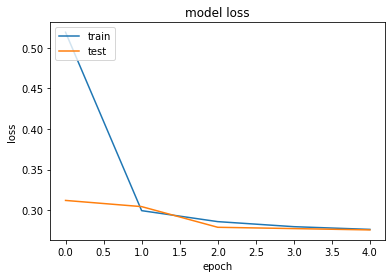

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()